# Description

# Environment

## Library Imports

In [1]:
import os
import gc
gc.enable()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

## Local Imports

In [2]:
from phuc import data_process, file
from phuc import visualization as vs

## Reload data path

In [3]:
from phuc.file import standard_template

standard_template.save_data_path(os.getcwd().split('/src')[0])

Loaded file data_path.pkl
Directory  /home/phuc/Desktop/Work/Data Sience/Epidemic Modeling/MathModel  already exists
Saved file data_path.pkl


##  Setup Pandas

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Set up data path

In [5]:
CURR_DIR = os.getcwd().split('/src')[0]

In [7]:
dir_path = file.load_pickle(CURR_DIR + '/data_path.pkl')['DIRS']
file_path = file.load_pickle(CURR_DIR + '/data_path.pkl')['FILES']

Loaded file data_path.pkl
Loaded file data_path.pkl


# Code

## Load data

In [19]:
EU_population = file.load_pickle(file_path['EU_POPULATION_PKL_PATH'])

EU_confirmed = file.load_pickle(file_path['EU_CONFIRMED_PKL_PATH'])

EU_death = file.load_pickle(file_path['EU_DEATH_PKL_PATH'])

EU_recover = file.load_pickle(file_path['EU_RECOVERED_PKL_PATH'])

Loaded file EU_population.pkl
Loaded file EU_confirmed.pkl
Loaded file EU_death.pkl
Loaded file EU_recovered.pkl


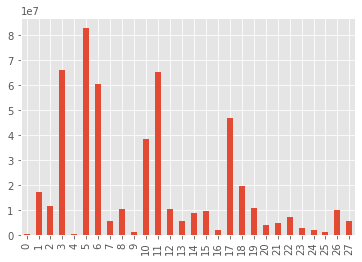

In [21]:
EU_population['Population'].plot.bar()

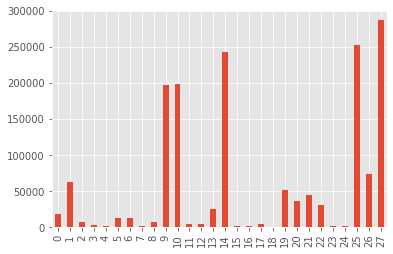

In [12]:
EU_confirmed[['Country/Region','7/8/20']].plot.bar(ind)

# Colab Settings

## Connect Drive

In [ ]:
from google.colab import drive 
# conncent phuc.phan1012000@hcmut.edu.vn

# default location for the drive
ROOT = "/content/drive"            
drive.mount(ROOT)   

## Load Library

In [ ]:
import sys
import os
# Load my phuc's library
sys.path.append("/content/drive/My Drive/Work/Data_Science_Library")

## Setup Project

In [ ]:
GIT_REPOSITORY = "kalapa-s-CreditScore"
# path to project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Work/Projects'
PROJECT_PATH = os.path.join(ROOT, MY_GOOGLE_DRIVE_PATH,GIT_REPOSITORY)

# GO TO WORKING PROJECT PATH
os.chdir(PROJECT_PATH+'/src')
os.remove(PROJECT_PATH+'/data_path.pkl')